<a href="https://colab.research.google.com/github/AEInha/Linear-Algebra/blob/main/ase2010_applied_linear_algebra_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASE2010 Applied linear algebra: Homework \#4
$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE2010: Applied linear algebra, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

<br>

---
## Population dynamics



Suppose $x_t$ is a hundred dimensional vector, with $(x_t)_i$ denoting the number of people in some population (say, a country) with age  $i$ in year $t$, where $t$ is measured starting from some base year, for $i= 1, \dots, 100$. While $(x_t)_i$ is an integer, it is large enough that we simply consider it a real number. In any case, our model certainly is not accurate at the level of individual people.  Also, note that the model does not track people older than $100$ years old. The following cell downloads the population data from a country in 2010.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("https://jonghank.github.io/ase2010/files/population_data.csv", \
                 header=None).values
x = data[:,0]   # population
b = data[:,1]   # birth rate
d = data[:,2]   # death rate
age = np.arange(100) + 1

The variable `x` displayed below represents the distribution (population) of ages from 1 to 100.

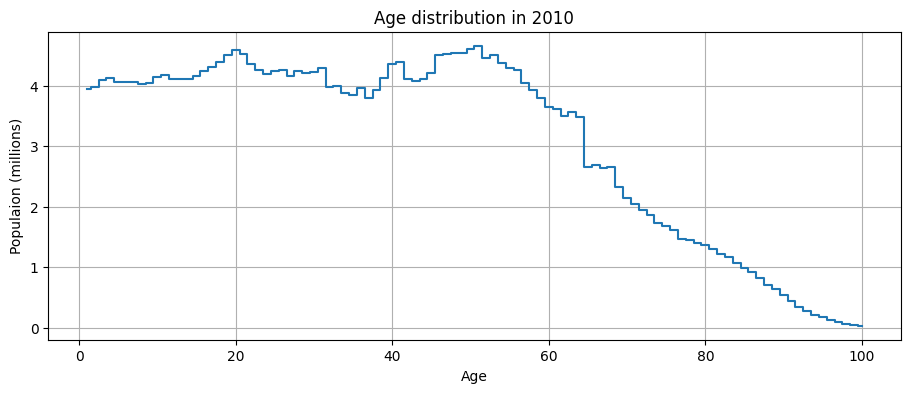

In [2]:
plt.figure(figsize=(11, 4), dpi=100)
plt.step(age, x, where="mid")
plt.title("Age distribution in 2010")
plt.xlabel("Age")
plt.ylabel("Populaion (millions)")
plt.grid()
plt.show()

The birth rate is given by a hundred dimensional vector $b$,  where $b_i$ is  the average number of births per person with age $i$, for $i=1,\dots,100$ (This is half the average number of births per woman with age $i$, assuming equal numbers of men and women in the population). Of course $b_i$ is approximately zero for $i<13$ and $i>50$.
The approximate birth rates for the country in year 2010 are shown in below.

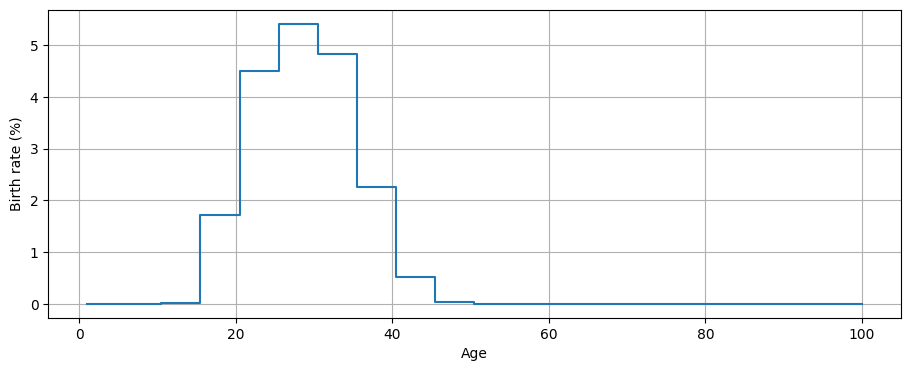

In [3]:
plt.figure(figsize=(11, 4), dpi=100)
plt.step(age, b*100, where="mid")
plt.xlabel("Age")
plt.ylabel("Birth rate (%)")
plt.grid()
plt.show()

The death rate is given by a hundred dimensional vector $d$, where $d_i$ is the portion of those aged $i$ who will die this year. The death rates for this country in year 2010 are shown below.

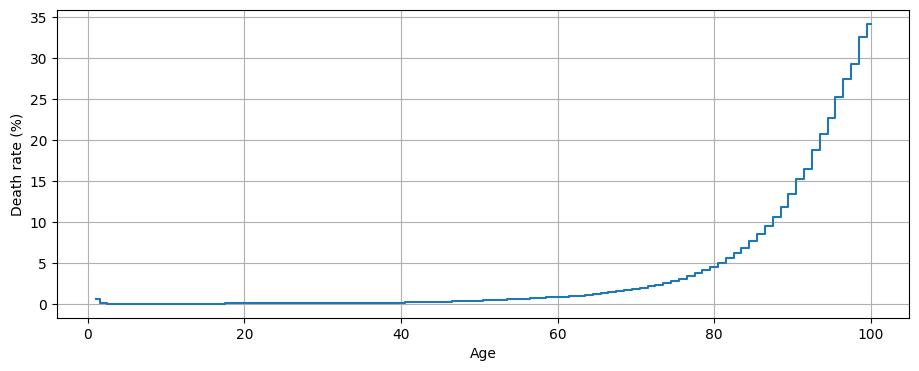

In [4]:
plt.figure(figsize=(11, 4), dpi=100)
plt.step(age, d*100, where="mid")
plt.xlabel("Age")
plt.ylabel("Death rate (%)")
plt.grid()
plt.show()

<br>

To derive the dynamical relations, we would like to find $x_{t+1}$ in terms of $x_t$, taking into account only births and deaths, and not immigration. The number of 1-year olds next year is the total number of births this year, so

$$
  (x_{t+1})_1 = b^T x_t
$$

The number of $i+1$ year olds next year is the number of $i$ year olds this year, minus those who die, so

$$
  (x_{t+1})_{i+1} = (1-d_i)(x_t)_i, \quad \text{for }i=1,\dots,99
$$

<br>

_**(Problem 1)**_ Predict the total population of this country at year 2020, and at year 2040. Display and explain how it changes.

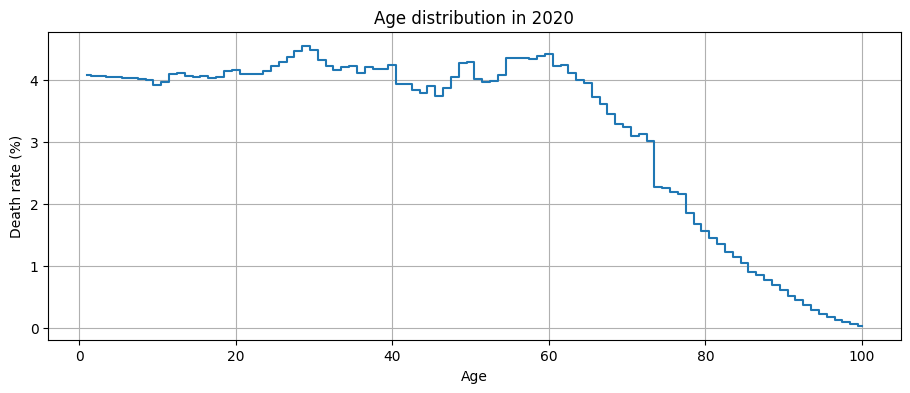

In [17]:
# your code here
X = [x]
D = [d]
N1 = 10
N2 = 30

for i in range(N2):
  x_first = np.dot(X[i],b)
  x_new = [x_first]
  for j in range(len(X[0])-1):
    x_new.append((1-d[j])*X[i][j])
  X.append(np.array(x_new))

plt.figure(figsize=(11, 4), dpi=100)
plt.step(age, X[N1-1], where="mid")
plt.title("Age distribution in 2020")
plt.xlabel("Age")
plt.ylabel("Death rate (%)")
plt.grid()
plt.show()

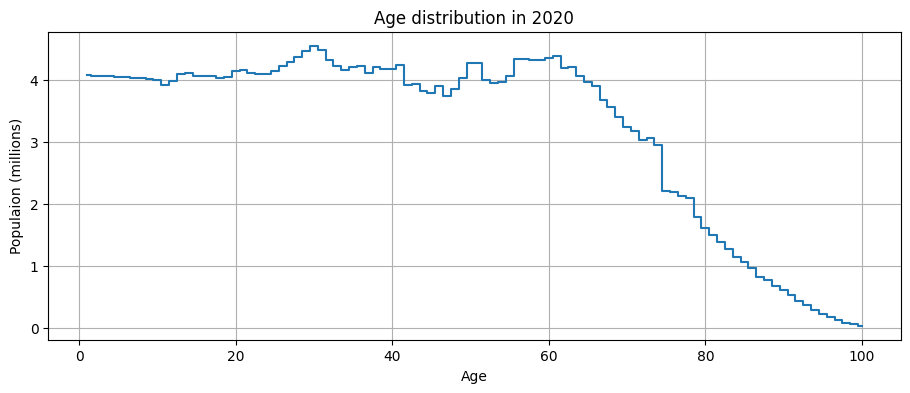

322.34617815096277


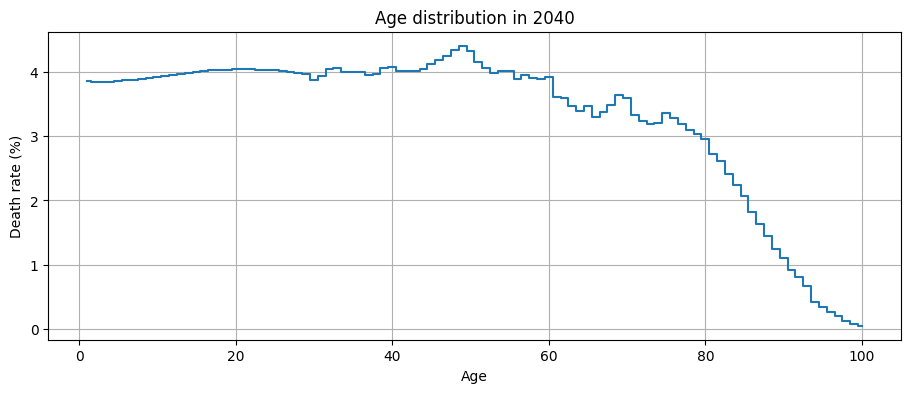

In [18]:
# your code here
plt.figure(figsize=(11, 4), dpi=100)
plt.step(age, X[N2-1], where="mid")
plt.title("Age distribution in 2040")
plt.xlabel("Age")
plt.ylabel("Death rate (%)")
plt.grid()
plt.show()

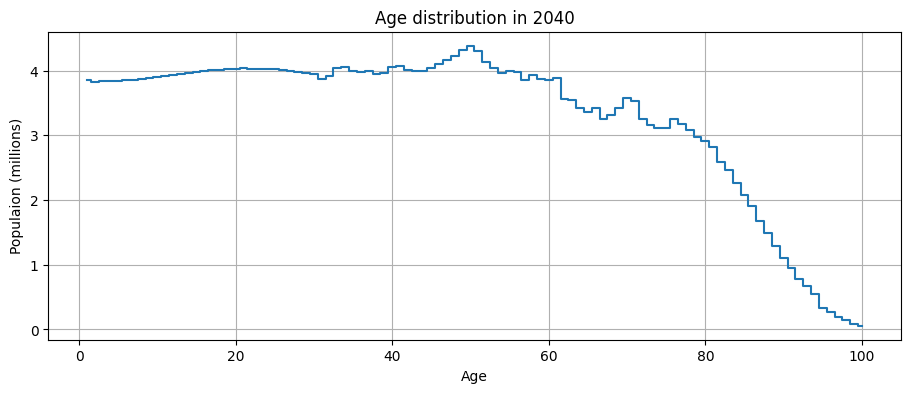

329.4727647641986


In [ ]:
|# your code here


<br>

_**(Problem 2)**_ Predict the number of elementary school students (ages from 8 to 13) in this country over the next 30 years. Do we need to construct more elementary schools, or do we need to close some? Justify your answer by presenting appropriate computational results.

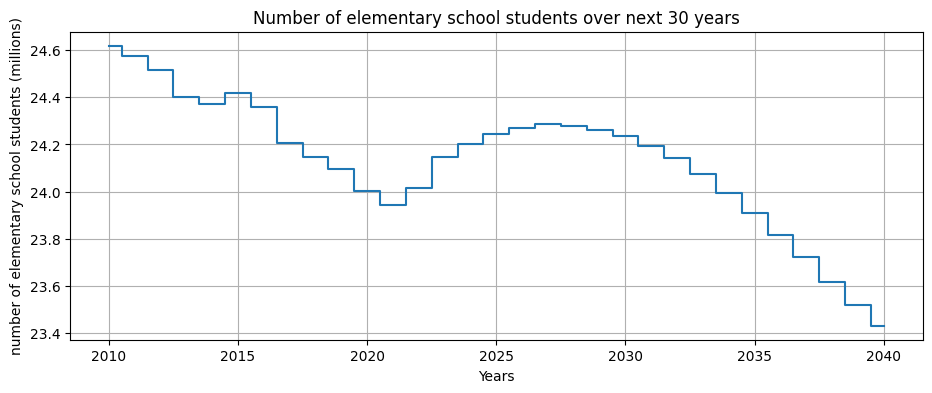

In [22]:
D = np.zeros(len(X))
for i in range(len(X)):
  D[i] = sum(X[i][7:13])
# your code here
plt.figure(figsize=(11, 4), dpi=100)
plt.step(range(2010,2010 + len(X)),D, where="mid")
plt.title("Number of elementary school students over next 30 years")
plt.xlabel("Years")
plt.ylabel("number of elementary school students (millions)")
plt.grid()
plt.show()

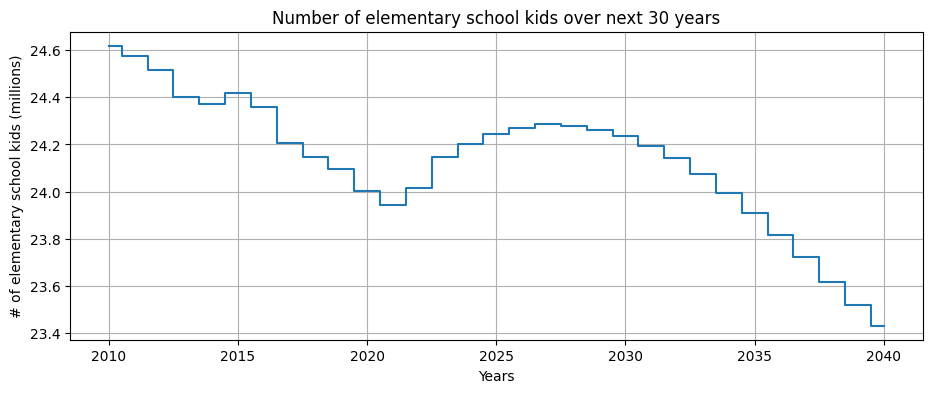

In [ ]:
# your code here


<br>

_**(Problem 3)**_ The country is now in need of population growth, and two political parties claim the following different policies. Both look positive for increasing the population growth rate in the long run.

- Party D: We should support the birth promotion campaigns and the children welfare programs, which is expected to  increase the birth rate over the entire age band by a factor of 1.01 every year.

- Party R: We should support the public health and the disease control systems, which is expected to decrease the death rate over the entire age band by a factor of 0.99 every year.

Which party would you vote for, if the budgets and efforts accompanying these two policies are similar? Justify your answer by presenting appropriate computational results.





In [23]:
# your code here
# your code here
def calculate_population(x,b,d,mode):
  X = [x]
  # your code here
  for i in range(N2):

    x_first = np.dot(X[i],b)
    x_new = [x_first]
    for j in range(len(X[0])-1):
      x_new.append((1-d[j])*X[i][j])
    X.append(np.array(x_new))
    if mode == "birth":
      b = 1.01 * b
    else:
      d = 0.99 * d
  return X


In [27]:
B = calculate_population(x,b,d,"birth")
D = calculate_population(x,b,d,"death")
B_population = np.array([sum(B[i]) for i in range(len(B))])
D_population = np.array([sum(D[i]) for i in range(len(D))])

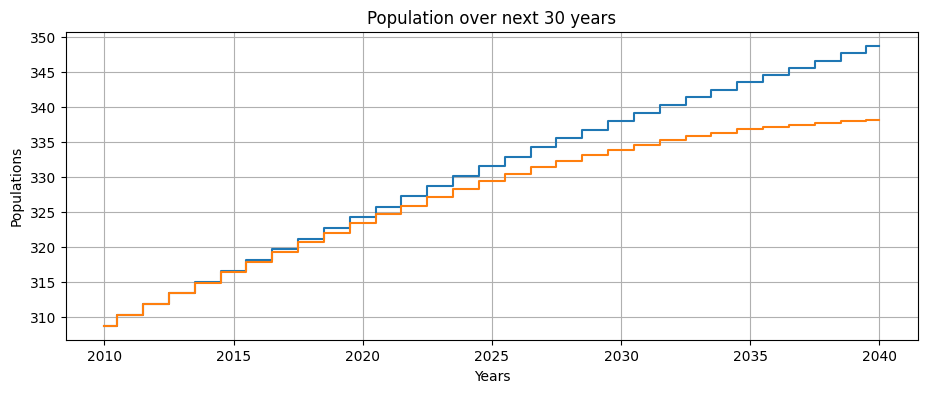

In [28]:
plt.figure(figsize=(11, 4), dpi=100)
plt.step(range(2010,2010 + len(X)),B_population, where="mid")
plt.step(range(2010,2010 + len(X)),D_population, where="mid")
plt.title("Population over next 30 years")
plt.xlabel("Years")
plt.ylabel("Populations")
plt.grid()
plt.show()

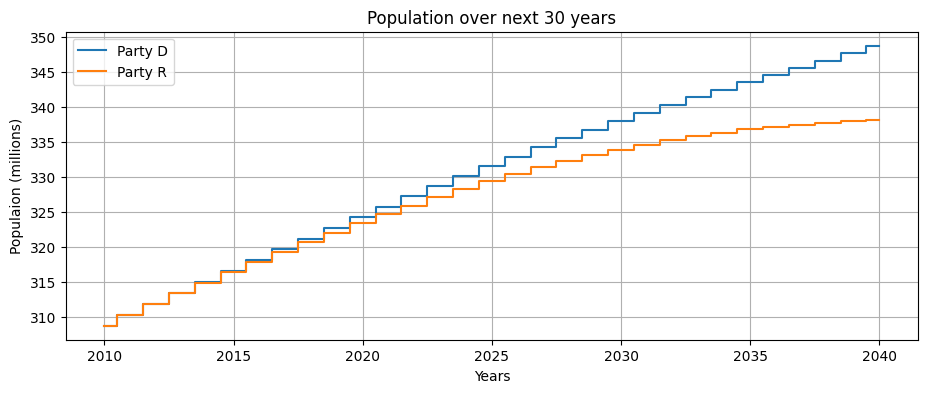